# Appendix

## Appendix 1. Surface plot and a contour plot of the function $A(a, \theta)$


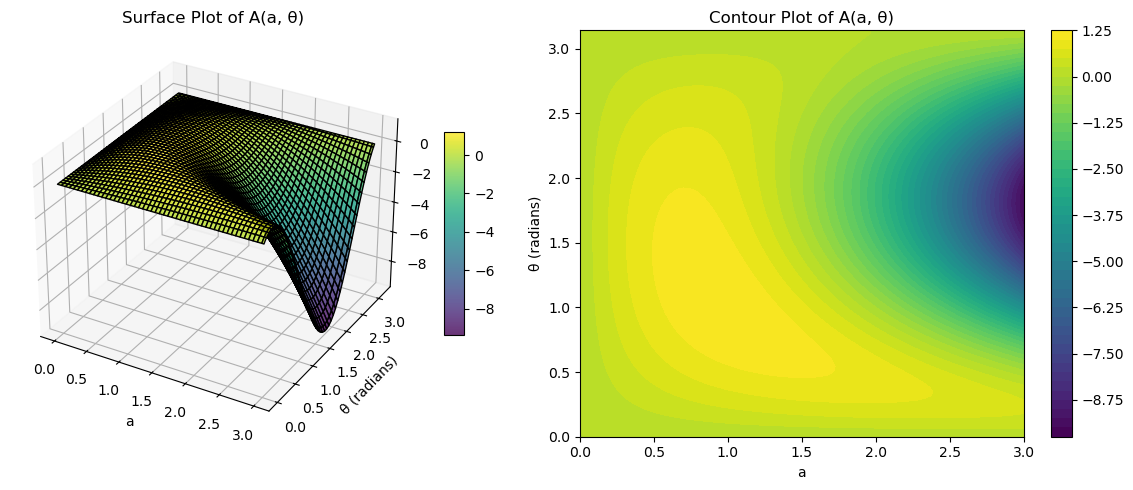

In [68]:
from collections.abc import Callable
from enum import StrEnum, auto
import logging

import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad, hessian
from numpy.typing import ArrayLike
from matplotlib.axes import Axes


def A(a, theta):
    return a * np.sin(theta) * (3 - a * (1 + np.sin(theta)) + 0.5 * a * np.cos(theta))


# Values and bounds for a and θ
a_values = np.linspace(0, 3, 100)
theta_values = np.linspace(0, np.pi, 100)
a_mesh, theta_mesh = np.meshgrid(a_values, theta_values)
A_values = A(a_mesh, theta_mesh)

fig = plt.figure(figsize=(12, 5))

# Surface plot
ax1 = fig.add_subplot(121, projection="3d")
surf = ax1.plot_surface(
    a_mesh, theta_mesh, A_values, cmap="viridis", edgecolor="k", alpha=0.8
)
ax1.set_title("Surface Plot of A(a, θ)")
ax1.set_xlabel("a")
ax1.set_ylabel("θ (radians)")
ax1.set_zlabel("A")
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(a_mesh, theta_mesh, A_values, levels=50, cmap="viridis")
ax2.set_title("Contour Plot of A(a, θ)")
ax2.set_xlabel("a")
ax2.set_ylabel("θ (radians)")
fig.colorbar(contour, ax=ax2)

# Show the plots
plt.tight_layout()
plt.show()

## Appendix 2. Calculate the values of $a$ and $\theta$ that maximize the function $A(a, \theta)$

This appendix uses 3 methods to estimate the values of $a$ and $\theta$ that maximize the function $A(a, \theta)$.

1. Use `sympy` to find the critical points of the function $A(a, \theta)$, and then use the second derivative test to determine whether the critical points are local maxima ($A$ i)
2. Use `sympy` to assist manual calculation.
3. Use the `scipy.optimize` module to find the global maximum of the function $A(a, \theta)$.


### Appendix 2.1. Use `sympy` to find the critical points of the function $A(a, \theta)$ and determine whether they are local maxima using Hessian


In [69]:
import sympy as sp

a, theta = sp.symbols("a theta")
A = (
    0.5 * a**2 * sp.sin(theta) * sp.cos(theta)
    + 3 * a * sp.sin(theta)
    - a**2 * sp.sin(theta) ** 2
    - a**2 * sp.sin(theta)
)

# Compute the gradient of A with respect to a and θ
dA_da = sp.diff(A, a)
dA_dtheta = sp.diff(A, theta)

# Set gradient to 0: dA/da = 0 and dA/dθ = 0
critical_points = sp.solve([dA_da, dA_dtheta], (a, theta), dict=True)
print("Critical Points:", critical_points)

# Filter the solutions to ensure they lie within the domain (0 < a < 3 and 0 < θ < π)
feasible_solutions = [
    (sol[a], sol[theta])
    for sol in critical_points
    if 0 < sol[a] < 3 and 0 < sol[theta] < sp.pi / 2
]
print("Feasible Solutions:", feasible_solutions)

# Compute the Hessian matrix
d2A_da2 = sp.diff(dA_da, a)
d2A_dtheta2 = sp.diff(dA_dtheta, theta)
d2A_dadt = sp.diff(dA_da, theta)
d2A_dtda = sp.diff(dA_dtheta, a)
hessian_matrix = sp.Matrix([[d2A_da2, d2A_dadt], [d2A_dtda, d2A_dtheta2]])

# Check if the Hessian matrix is negative definite
# Then the point is local maximizer
for sol_a, sol_theta in feasible_solutions:
    H_at_point = hessian_matrix.subs({a: sol_a, theta: sol_theta})
    eigenvalues = H_at_point.eigenvals()
    is_negative_definite = all(val < 0 for val in eigenvalues)
    if is_negative_definite:
        classification = "Local Maximum (Hessian is Negative Definite)"
    else:
        classification = "Not a Local Maximum"
    print(f"\nAt point (a, theta) = ({sol_a}, {sol_theta}):")
    print(f"Hessian Matrix: {H_at_point}")
    print(f"has eigenvalues: {eigenvalues}")
    print(f"Classification: {classification}")

# Find the optimal solution (maximum area)
max_area = None
optimal_a = None
optimal_theta = None

for sol_a, sol_theta in feasible_solutions:
    area_value = A.subs({a: sol_a, theta: sol_theta})
    if max_area is None or area_value > max_area:
        max_area = area_value
        optimal_a = sol_a
        optimal_theta = sol_theta

print(f"\nOptimal a: {optimal_a}")
print(
    f"Optimal theta: {optimal_theta} (roughly {sp.deg(optimal_theta).evalf(): .2f} degrees)"
)
print(f"Maximum area: {max_area}")

Critical Points: [{a: -12.9282032302755, theta: -1.04719755119660}, {a: 0.0, theta: 0.0}, {a: 0.928203230275509, theta: 1.04719755119660}, {a: 6.00000000000000, theta: 0.0}]
Feasible Solutions: [(0.928203230275509, 1.04719755119660)]

At point (a, theta) = (0.928203230275509, 1.04719755119660):
Hessian Matrix: Matrix([[-2.79903810567666, -1.50000000000000], [-1.50000000000000, -1.54998149518621]])
has eigenvalues: {-3.79932843771145: 1, -0.549691163151426: 1}
Classification: Local Maximum (Hessian is Negative Definite)

Optimal a: 0.928203230275509
Optimal theta: 1.04719755119660 (roughly  60.00 degrees)
Maximum area: 1.20577136594005


### Appendix 2.2. Use `sympy` to assist manual calculation


In [70]:
# Solve dA/da = 0 for a
a_by_theta = sp.solve(dA_da, a)
a_by_theta

[3.0/(2.0*sin(theta) - cos(theta) + 2.0)]

In [71]:
# Substitute into dA/dtheta
dAdtheta_theta = sp.simplify(
    dA_dtheta.subs({a: 3 / (2 * sp.sin(theta) - sp.cos(theta) + 2)})
)
dAdtheta_theta

(9.0*cos(theta) - 4.5)/(3.0*sin(theta)**2 - 4.0*sin(theta)*cos(theta) + 8.0*sin(theta) - 4.0*cos(theta) + 5.0)

In [72]:
# Solve dA/dtheta = 0 for θ
theta_sol = sp.solve(dAdtheta_theta, theta)
theta_sol

[1.04719755119660, 5.23598775598299]

In [73]:
# Solution for a
a_sol = a_by_theta[0].subs({theta: theta_sol[0]})
a_sol

0.928203230275509

In [74]:
sp.simplify(A.subs({a: 6 / (2 * sp.sqrt(3) + 3), theta: sp.pi / 3}))

8.99999999999999 - 4.5*sqrt(3)

In [75]:
A.subs({a: a_sol, theta: theta_sol[0]})

1.20577136594005

### Appendix 2.3. `scipy.optimize.shgo` to find the global maximum of the function $A(a, \theta)$


In [76]:
from scipy.optimize import shgo


def negative_A(a_theta: ArrayLike) -> float:
    a, theta = a_theta
    return (
        -1 * a * np.sin(theta) * (3 - a - a * np.sin(theta) + 0.5 * a * np.cos(theta))
    )


# Define the bounds for 'a' and theta
bounds = [(0, 3), (0, np.pi / 2)]

result = shgo(negative_A, bounds, n=200, sampling_method="sobol")

# Get the best maximum value found by shgo
max_x = result.x
max_value = -1 * result.fun


print("Global maximum occurs at:")
print(f"a = {max_x[0]}, t = {max_x[1]}")
print(f"Maximum area: {max_value}")

Global maximum occurs at:
a = 0.9282032150576053, t = 1.0471975556296944
Maximum area: 1.205771365940052


## Appendix 3. Optimization algorithms

### Appendix 3.a. Gradient Descent


In [77]:
def bisection_method(
    f: Callable, a: float, b: float, eps: float = 1e-8
) -> tuple[float, float]:
    """Bisection method to find the minimum of function f within the interval [a, b].

    Inputs:
    - f: The function to minimize.
    - a: Left endpoint of the interval.
    - b: Right endpoint of the interval.
    - eps: The precision level for termination (default is 1e-5).

    Output:
    - The bracketed interval [a, b] containing the local minimum.
    """
    if a >= b:
        a, b = b, a

    grad_f = grad(f)

    # If either f'(a) or f'(b) doesn't meet conditions, expand the interval
    f_prime_a = grad_f(a)
    f_prime_b = grad_f(b)

    if f_prime_a >= 0 or f_prime_b <= 0:
        a, b = expand_interval(f, grad_f, a, b)

    while abs(b - a) > eps:
        m = (a + b) / 2
        f_prime_m = grad_f(m)

        if f_prime_m > 0:
            b = m
        else:
            a = m

    return float(a), float(b)


def expand_interval(
    f: Callable, grad_f: Callable, a: float, b: float, w_factor: float = 1.0
) -> tuple[float, float]:
    """Expands the interval [a, b] until f'(a) < 0 and f'(b) > 0 are satisfied.

    Inputs:
    - f: The function to minimize.
    - grad_f: The gradient of the function.
    - a: Left endpoint of the interval.
    - b: Right endpoint of the interval.
    - w_factor: Factor for expanding the interval (default is 1.0).

    Output:
    - The new interval [a, b].
    """
    while True:
        w = abs((b - a) / 2)

        f_prime_a = grad_f(a)
        f_prime_b = grad_f(b)

        if f_prime_a < 0 and f_prime_b > 0:
            return a, b

        a = a - w_factor * w
        b = b + w_factor * w

    return a, b


def backtracking_line_search(
    f: Callable,
    x_i: ArrayLike,
    d: ArrayLike | None = None,
    alpha: float = 1.0,
    p: float = 0.5,
    c: float = 1e-4,
) -> float:
    """
    Backtracking line search algorithm to find the optimal step size alpha.

    Inputs:
    - f: Objective function
    - x_i: Current point (numpy array)
    - d: Descent direction (numpy array)
    - alpha: Initial step size (default is 1.0)
    - p: Scaling factor to reduce alpha (default is 0.5). 0 < p < 1
    - c: Constant for the Armijo condition (default is 1e-4). 0 < c <= 0.5

    Output:
    - alpha: Step size that satisfies the Armijo condition
    """
    grad_f = grad(f)
    if d is None:
        d = -grad_f(x_i)  # Steepest descent direction

    while f(x_i + alpha * d) > f(x_i) + c * alpha * np.dot(grad_f(x_i), d):
        alpha *= p  # Reduce alpha by factor p

    return alpha


def _validate_inputs(func, tol, max_iter, step_size):
    if not callable(func):
        raise ValueError("func must be a callable function")

    if not isinstance(tol, (float, np.floating)):
        raise ValueError(f"Tolerance must be a float. Current type: {type(tol)}")
    elif not (0.0 < tol < 1.0):
        raise ValueError(
            f"Tolerence must be a float between 0 and 1. Current value: {tol}"
        )

    if not isinstance(max_iter, int) or max_iter <= 0:
        raise ValueError(
            f"max_iter must be a positive integer. Current type: {type(max_iter)}; current value: {max_iter}"
        )

    valid_stepsize_strategies = [e.value for e in StepSize]
    if step_size not in valid_stepsize_strategies:
        raise ValueError(
            f"step_size must be a valid strategy: {valid_stepsize_strategies}"
        )


def choose_step_size(
    func: Callable,
    step_size: str,
    initial_alpha: float,
    x_i: ArrayLike,
    d: ArrayLike,
    i: int,
) -> float:
    if step_size == StepSize.FIXED:
        return initial_alpha
    elif step_size == StepSize.EXACT:
        return bisection_method(func, 0, 1)
    elif step_size == StepSize.INEXACT:
        return backtracking_line_search(func, x_i, d)
    elif step_size == StepSize.SHRINKING:
        return initial_alpha / (1 + i)


def check_termination(termination_conditions, i, x_i, grad_x_i, x_next, tol, max_iter):
    if TerminationCondition.GRAD_NORM in termination_conditions:
        if np.linalg.norm(grad_x_i) < tol:
            return True

    if TerminationCondition.ABSOLUTE_IMPROVEMENT in termination_conditions:
        if np.linalg.norm(x_next - x_i) < tol:
            return True

    if TerminationCondition.RELATIVE_IMPROVEMENT in termination_conditions:
        if np.linalg.norm(x_next - x_i) < tol * max(np.linalg.norm(x_i), 1e-8):
            return True

    if TerminationCondition.MAX_ITERATIONS in termination_conditions and i >= max_iter:
        return True

    return False


def check_convergence(num_steps, num_iter):
    return num_steps < num_iter

INFO:__main__:Gradient descent 	 [0.92819983 1.04719603] 	 [1.5 0. ] 	 inexact 	 grad norm, max iterations 	 1e-07 	 20 	 False
INFO:__main__:Gradient descent 	 [0.9282073  1.04716482] 	 [2.         0.78539816] 	 inexact 	 grad norm, max iterations 	 1e-07 	 25 	 False


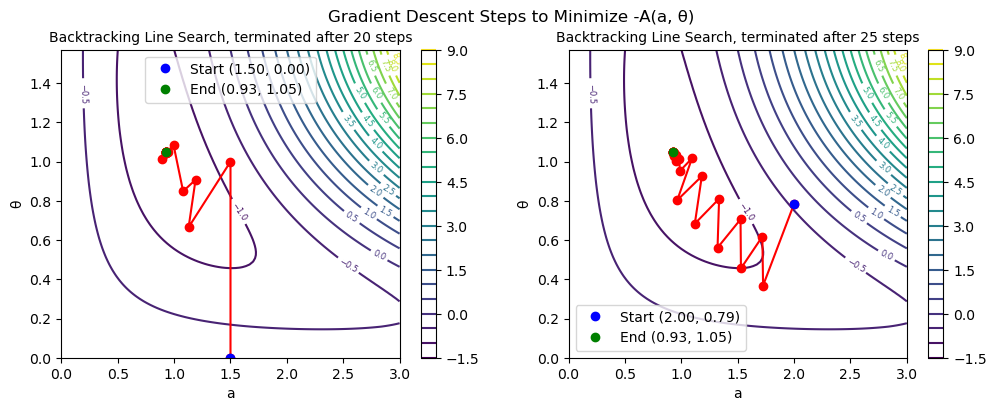

In [78]:
from collections.abc import Callable
from enum import StrEnum, auto
import logging

import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad
from numpy.typing import ArrayLike
from matplotlib.axes import Axes

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# if there is no file handler, add one
if not logger.handlers:
    logger.addHandler(logging.FileHandler("../logs/descent.log"))

# if the file is empty, write the header
if not open("../logs/descent.log").read():
    logger.info(
        "algorithm \t solution \t x0 \t step_size \t termination_conditions \t tol \t num_steps \t convergence"
    )


class StepSize(StrEnum):
    FIXED = auto()
    INEXACT = auto()
    EXACT = auto()
    SHRINKING = auto()


class TerminationCondition(StrEnum):
    ABSOLUTE_IMPROVEMENT = "absolute improvement"
    RELATIVE_IMPROVEMENT = "relative improvement"
    GRAD_NORM = "grad norm"
    MAX_ITERATIONS = "max iterations"


def gradient_descent(
    func: Callable,
    x0: ArrayLike,
    step_size: StepSize | str = StepSize.FIXED,
    initial_alpha: float = 0.05,
    termination_conditions: list[TerminationCondition] = [
        TerminationCondition.GRAD_NORM,
        TerminationCondition.MAX_ITERATIONS,
    ],
    tol: float = 1e-7,
    max_iter: int = 100,
) -> tuple[ArrayLike, list[ArrayLike], int]:
    """Gradient descent optimization algorithm.

    Args:
        func: callable. Function to be optimized.
        x0: array-like. Initial guess.
        step_size: step size strategy. Valid values are from the StepSize Enum, including 'fixed', 'inexact', 'exact', 'shrinking'.
        initial_alpha: float. Initial step size.
        tol: float. Tolerance to stop the optimization.
        max_iter: int. Maximum number of iterations.

    Returns:
        x_next: array-like. Optimal solution found.
        steps: list of array-like. Steps taken by the algorithm.
        num_steps: int. Number of steps taken.
    """
    _validate_inputs(func, tol, max_iter, step_size)

    x_i = np.array(x0)
    gradient = grad(func)

    steps = [x_i.copy()]  # Store steps for plotting

    i = 1
    while True:
        grad_x_i = gradient(x_i) / np.linalg.norm(gradient(x_i))
        alpha = choose_step_size(func, step_size, initial_alpha, x_i, -grad_x_i, i)
        x_next = x_i - alpha * grad_x_i
        steps.append(x_next.copy())

        if check_termination(
            termination_conditions, i, x_i, grad_x_i, x_next, tol, max_iter
        ):
            break

        # Update for next iteration
        i += 1
        x_i = x_next

    # Log experiment conditions and results to a file
    termination_conditions_str = ", ".join([tc.value for tc in termination_conditions])
    step_strategy = step_size if isinstance(step_size, str) else step_size.value
    convergence = check_convergence(i, max_iter)

    if step_size == StepSize.FIXED:
        step_strategy = f"{step_strategy} ({initial_alpha})"

    logger.info(
        f"Gradient descent \t {(x_next)} \t {np.array(x0)} \t {step_strategy} \t {termination_conditions_str} \t {tol} \t {i} \t {convergence}"
    )

    return x_next, steps, i


def plot_steps(
    func: Callable,
    steps: list[ArrayLike],
    title: str = None,
    x_range: tuple[float, float] = (0, 3),
    y_range: tuple[float, float] = (0, np.pi / 2),
    ax: Axes = None,
):
    """Plot the steps taken by the optimization algorithm on a contour plot of the function.

    Args:
        func: callable. Function to be optimized.
        steps: list of array-like. Steps taken by the optimization algorithm.
        title: str. Title of the plot.
        x_range: tuple. Range of x values for the contour plot.
        y_range: tuple. Range of y values for the contour plot.
        ax: matplotlib Axes. Axes to plot the steps.
    """
    if not callable(func):
        raise ValueError("func must be a callable function")
    if len(steps[0]) != 2:
        raise ValueError("func must be a 2D function")

    steps = np.array(steps)

    # Create a meshgrid for the contour plot
    x = np.linspace(*x_range, 100)
    y = np.linspace(*y_range, 100)
    X, Y = np.meshgrid(x, y)
    Z = func([X, Y])

    if ax is None:
        _, ax = plt.subplots()

    contour_plot = ax.contour(X, Y, Z, levels=20, cmap="viridis")
    ax.clabel(contour_plot, contour_plot.levels, inline=True, fontsize=6)
    plt.colorbar(contour_plot)

    # Plot steps, start, and end points
    ax.plot(steps[:, 0], steps[:, 1], "ro-")
    ax.plot(
        steps[0, 0],
        steps[0, 1],
        "bo",
        label=f"Start ({steps[0, 0]:.2f}, {steps[0, 1]:.2f})",
    )
    ax.plot(
        steps[-1, 0],
        steps[-1, 1],
        "go",
        label=f"End ({steps[-1, 0]:.2f}, {steps[-1, 1]:.2f})",
    )

    ax.set_xlabel("a")
    ax.set_ylabel("θ")
    ax.legend()

    if title:
        ax.set_title(title, fontsize=10)
    else:
        ax.set_title(f"Gradient descent of func {func.__name__}")


# Initial guess
x01 = [1.5, 0]
x02 = [2, np.pi / 4]

# Run the gradient descent algorithm
optimal_a1, steps1, num_steps1 = gradient_descent(
    negative_A, x01, step_size=StepSize.INEXACT, max_iter=20
)
optimal_a2, steps2, num_steps2 = gradient_descent(
    negative_A, x02, step_size=StepSize.INEXACT, max_iter=25
)

# Plot the steps taken by the algorithm
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig1.suptitle("Gradient Descent Steps to Minimize -A(a, θ)")
plot_steps(
    negative_A,
    steps1,
    ax=ax1,
    title=f"Backtracking Line Search, terminated after {num_steps1} steps",
)
plot_steps(
    negative_A,
    steps2,
    ax=ax2,
    title=f"Backtracking Line Search, terminated after {num_steps2} steps",
)

In [79]:
# Produce a table of steps taken by the gradient descent algorithm
step_table = np.array(steps1)
step_table2 = np.array(steps2)

print(f"Steps taken by the gradient descent algorithm (initial guess: {x01}):")
print(step_table)

Steps taken by the gradient descent algorithm (initial guess: [1.5, 0]):
[[1.5        0.        ]
 [1.5        1.        ]
 [1.12840184 0.6654633 ]
 [1.19009075 0.90773273]
 [1.07977528 0.84894925]
 [0.99507699 1.08416447]
 [0.89046769 1.01574011]
 [0.94175972 1.05145254]
 [0.92843183 1.04329728]
 [0.93106034 1.04618687]
 [0.92926063 1.0454281 ]
 [0.92877085 1.04731882]
 [0.92792875 1.04682431]
 [0.92832016 1.04711623]
 [0.92820147 1.04708769]
 [0.92828697 1.04717482]
 [0.92823134 1.04714971]
 [0.92821844 1.04720937]
 [0.92819323 1.04719217]
 [0.92820604 1.04720046]
 [0.92819983 1.04719603]]


In [80]:
print(f"Steps taken by the gradient descent algorithm (initial guess: {x02}):")
print(step_table2)

Steps taken by the gradient descent algorithm (initial guess: [2, 0.7853981633974483]):
[[2.         0.78539816]
 [1.72452407 0.36812965]
 [1.71820593 0.6180498 ]
 [1.52813193 0.4556556 ]
 [1.52455155 0.70562996]
 [1.32055757 0.56110849]
 [1.33444131 0.81072268]
 [1.11908345 0.68375421]
 [1.18109971 0.92594006]
 [0.96312572 0.80351725]
 [1.09373387 1.0166874 ]
 [0.98648808 0.95247416]
 [0.98031872 1.01466893]
 [0.95053682 1.00520317]
 [0.95308923 1.03634876]
 [0.93859308 1.03051761]
 [0.93357235 1.04531398]
 [0.92997679 1.0437873 ]
 [0.93009952 1.04573656]
 [0.92913956 1.04555724]
 [0.92887446 1.04749229]
 [0.92804849 1.04697128]
 [0.92843826 1.04726539]
 [0.92822915 1.04713938]
 [0.92823756 1.04716871]
 [0.9282073  1.04716482]]


### Appendix 3.b. Gradient descent, Newton's method, and conjugate gradient method

#### Appendix 3.b.1. Gradient descent with fixed step size


INFO:__main__:Gradient descent 	 [0.92069247 1.04218867] 	 [1.5 0. ] 	 fixed (0.01) 	 grad norm, max iterations 	 1e-07 	 500 	 False
INFO:__main__:Gradient descent 	 [0.93466644 1.05150864] 	 [2.         0.78539816] 	 fixed (0.01) 	 grad norm, max iterations 	 1e-07 	 1000 	 False


Optimal a3: [0.92069247 1.04218867]
Optimal a4: [0.93466644 1.05150864]


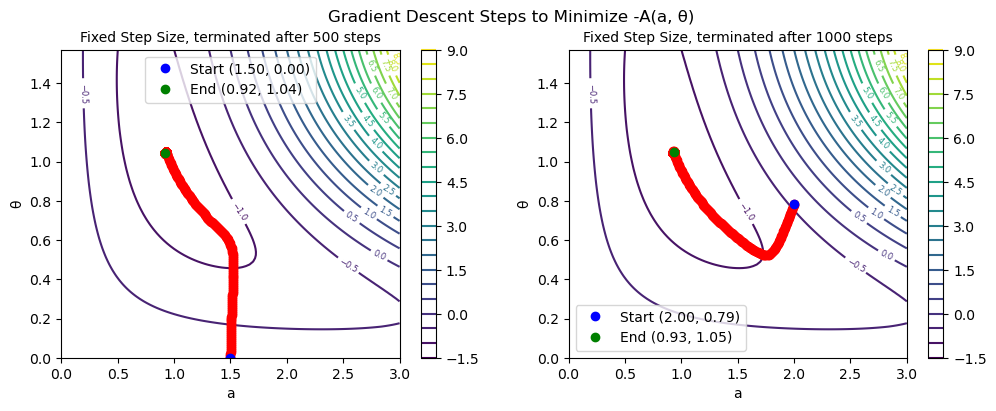

In [81]:
# Run the gradient descent algorithm
optimal_a3, steps3, num_steps3 = gradient_descent(
    negative_A, x01, step_size=StepSize.FIXED, initial_alpha=0.01, max_iter=500
)
optimal_a4, steps4, num_steps4 = gradient_descent(
    negative_A, x02, step_size=StepSize.FIXED, initial_alpha=0.01, max_iter=1000
)

fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 4))
fig2.suptitle("Gradient Descent Steps to Minimize -A(a, θ)")
plot_steps(
    negative_A,
    steps3,
    ax=ax3,
    title=f"Fixed Step Size, terminated after {num_steps3} steps",
)
plot_steps(
    negative_A,
    steps4,
    ax=ax4,
    title=f"Fixed Step Size, terminated after {num_steps4} steps",
)
print(f"Optimal a3: {optimal_a3}")
print(f"Optimal a4: {optimal_a4}")

#### Appendix 3.b.2. Conjugate gradient (Fletcher-Reeves) method


INFO:__main__:Conjugate gradient 	 [0.92820333 1.04719742] 	 [1.5 0. ] 	 inexact 	 grad norm, max iterations 	 1e-07 	 134 	 True
INFO:__main__:Conjugate gradient 	 [0.92820326 1.04719752] 	 [2.         0.78539816] 	 inexact 	 grad norm, max iterations 	 1e-07 	 37 	 True


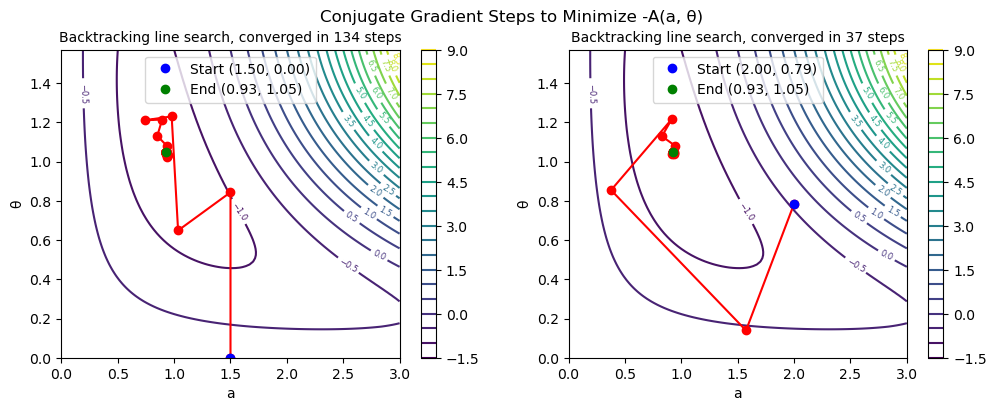

In [87]:
def conjugate_gradient(
    f: Callable,
    x0: ArrayLike,
    step_size: StepSize | str = StepSize.INEXACT,
    termination_conditions: list[TerminationCondition] = [
        TerminationCondition.GRAD_NORM,
        TerminationCondition.MAX_ITERATIONS,
    ],
    tol: float = 1e-7,
    max_iter: int = 200,
) -> tuple[ArrayLike, list[ArrayLike], int]:
    """Conjugate Gradient method to minimize a function using the Fletcher-Reeves formula.

    Args:
        f: The objective function to minimize.
        grad_f: The gradient of the function.
        x0: Initial guess for the variables.
        step_size: Step size strategy. Valid values are from the StepSize Enum, including 'fixed', 'inexact', 'exact', 'shrinking'.
        termination_conditions: Conditions to stop the optimization.
        tol: Tolerance for convergence.
        max_iter: Maximum number of iterations.

    Returns:
        x_next: The optimal solution found.
        steps: The steps taken by the algorithm.
        i: The number of iterations performed.
    """

    x_i = np.array(x0, dtype=float)
    grad_f = grad(f)
    g_i = grad_f(x_i)
    d_i = -g_i
    steps = [x_i.copy()]

    i = 1
    while True:
        alpha = choose_step_size(f, step_size, 0.05, x_i, d_i, i)

        x_next = x_i + alpha * d_i
        g_next = grad_f(x_next)

        beta = np.dot(g_next, g_next) / np.dot(g_i, g_i)  # Fletcher-Reeves formula
        d_next = -g_next + beta * d_i

        x_i, g_i, d_i = x_next, g_next, d_next
        i += 1

        steps.append(x_i.copy())

        # Check termination conditions
        if check_termination(
            termination_conditions, i, x_i, g_i, x_next, tol, max_iter
        ):
            break

    termination_conditions_str = ", ".join([tc.value for tc in termination_conditions])
    step_strategy = step_size if isinstance(step_size, str) else step_size.value
    convergence = check_convergence(i, max_iter)
    logger.info(
        f"Conjugate gradient \t {(x_next)} \t {np.array(x0)} \t {step_strategy} \t {termination_conditions_str} \t {tol} \t {i} \t {convergence}"
    )
    return x_i, steps, i


# Run the conjugate gradient algorithm
optimal_a5, steps5, num_steps5 = conjugate_gradient(negative_A, x01)
optimal_a6, steps6, num_steps6 = conjugate_gradient(
    negative_A, x02, step_size=StepSize.INEXACT, max_iter=100
)

# Plot the steps taken by the algorithm
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(12, 4))
fig3.suptitle("Conjugate Gradient Steps to Minimize -A(a, θ)")
plot_steps(
    negative_A,
    steps5,
    ax=ax5,
    title=f"Backtracking line search, converged in {num_steps5} steps",
)
plot_steps(
    negative_A,
    steps6,
    ax=ax6,
    title=f"Backtracking line search, converged in {num_steps6} steps",
)

For reference, this is `scipy.optimize.minimize` implementation of conjugate gradient method. It uses a nonlinear conjugate gradient algorithm (Fletcher-Reeves variant) to find the minimum of a function.


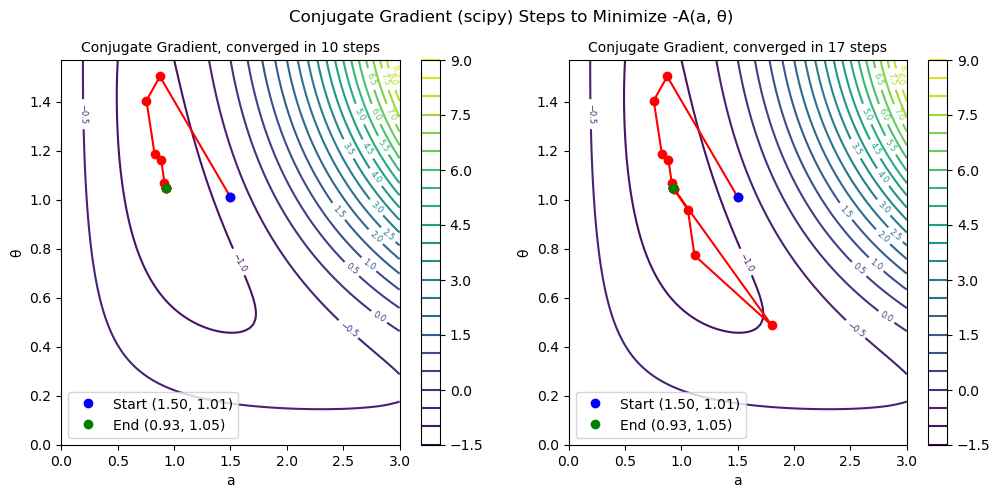

In [83]:
from scipy.optimize import minimize

# Store the steps taken
steps_taken = []


def callback_function(xk):
    """Callback function to store each step."""
    steps_taken.append(xk)


# Use scipy.optimize.minimize with the Conjugate Gradient method
minimize(
    fun=negative_A,
    x0=x01,
    method="CG",
    callback=callback_function,
)

fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(12, 5))

fig3.suptitle("Conjugate Gradient (scipy) Steps to Minimize -A(a, θ)")
plot_steps(
    negative_A,
    steps_taken,
    ax=ax5,
    title=f"Conjugate Gradient, converged in {len(steps_taken)} steps",
)

minimize(
    fun=negative_A,
    x0=x02,
    method="CG",
    callback=callback_function,
)

plot_steps(
    negative_A,
    steps_taken,
    ax=ax6,
    title=f"Conjugate Gradient, converged in {len(steps_taken)} steps",
)

#### Appendix 3.b.3. Newton's method with backtracking line search


INFO:__main__:Newton method 	 [-1.18329136e-30  0.00000000e+00] 	 [1.5 0. ] 	 inexact 	 grad norm, max iterations 	 1e-07 	 6 	 True
INFO:__main__:Newton method 	 [0.92820323 1.04719755] 	 [2.         0.78539816] 	 inexact 	 grad norm, max iterations 	 1e-07 	 9 	 True


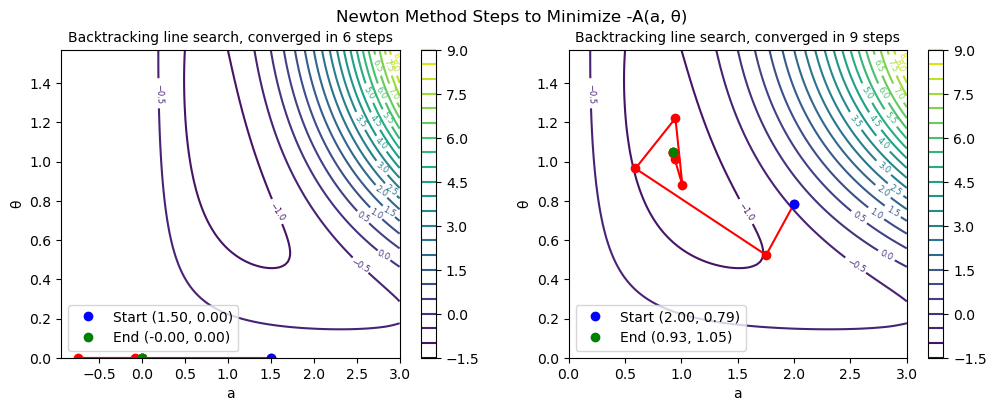

In [93]:
from autograd import hessian, grad


def newton_method(
    func: Callable,
    x0: ArrayLike,
    termination_conditions: list[TerminationCondition] = [
        TerminationCondition.GRAD_NORM,
        TerminationCondition.MAX_ITERATIONS,
    ],
    tol: float = 1e-7,
    max_iter: int = 100,
):
    """Minimize a function using Newton-Raphson method and backtracking line search."""
    x_i = np.array(x0)
    grad_f = grad(func)
    hess_f = hessian(func)

    steps = [x_i.copy()]  # Store steps for plotting

    i = 1
    while True:
        grad_i = grad_f(x_i)
        hess_i = hess_f(x_i)

        # Regularize Hessian if it's near-singular to ensure numerical stability
        if np.linalg.cond(hess_i) > 1 / tol:
            hess_i += 1e-3 * np.eye(len(x_i))

        # Newton-Raphson step: x_next = x_i - gamma * (H^-1) @ grad
        try:
            delta_i = np.linalg.solve(hess_i, grad_i)  # = H^-1 @ grad
            # alpha = 0.8  # Fixed step size
            alpha = backtracking_line_search(func, x_i, -delta_i)
            x_next = x_i - alpha * delta_i
        except np.linalg.LinAlgError:
            raise ValueError("Hessian is singular or near-singular. No solution found.")

        # Terminate if the norm of the gradient is less than the tolerance
        if check_termination(
            termination_conditions, i, x_i, grad_i, x_next, tol, max_iter
        ):
            break

        # Update for next iteration
        i += 1
        steps.append(x_next.copy())
        x_i = x_next

    termination_conditions_str = ", ".join([tc.value for tc in termination_conditions])
    convergence = check_convergence(i, max_iter)
    logger.info(
        f"Newton method \t {x_next} \t {np.array(x0)} \t inexact \t {termination_conditions_str} \t {tol} \t {i} \t {convergence}"
    )
    return x_next, steps, i  # Return the steps even if not converged


# Run the Newton method
optimal_a7, steps7, num_steps7 = newton_method(negative_A, x01)
optimal_a8, steps8, num_steps8 = newton_method(negative_A, x02)

# Plot the steps taken by the algorithm
fig4, (ax7, ax8) = plt.subplots(1, 2, figsize=(12, 4))
fig4.suptitle("Newton Method Steps to Minimize -A(a, θ)")
plot_steps(
    negative_A,
    steps7,
    ax=ax7,
    title=f"Backtracking line search, converged in {num_steps7} steps",
)
plot_steps(
    negative_A,
    steps8,
    ax=ax8,
    title=f"Backtracking line search, converged in {num_steps8} steps",
)

### Appendix 3.c. Performance comparison of optimization algorithms


In [94]:
import pandas as pd

# Read the log file into a DataFrame
log_file = "../logs/descent.log"
df = pd.read_csv(log_file, sep="\t", index_col=False, header=0)
df.columns = df.columns.str.strip()  # Remove leading/trailing whitespaces

# Remove duplicate rows, by comparing all columns except 'solution'
df = df.drop_duplicates(subset=df.columns.difference(["solution"]), keep="last")

# Change type of columns
df["solution"] = df["solution"].apply(
    lambda x: np.fromstring(str(x).replace("[", "").replace("]", "").strip(), sep=" ")
)
df["x0"] = df["x0"].apply(
    lambda x: np.fromstring(str(x).replace("[", "").replace("]", "").strip(), sep=" ")
)

# Sort by distance to the maximum value
df["distance_to_max"] = df["solution"].apply(
    lambda sol: np.linalg.norm(
        np.array(sol) - np.array([6 / (2 * np.sqrt(3) + 3), np.pi / 3])
    )
)
df = df.sort_values(by="distance_to_max", ascending=True, ignore_index=True)

df

,algorithm,solution,x0,step_size,termination_conditions,tolerance,num_steps,converence,distance_to_max
0,Newton method,"[0.92820323, 1.04719755]","[2.0, 0.78539816]",inexact,"grad norm, max iterations",1.000000e-07,9,True,1.227905e-09
1,Conjugate gradient,"[0.92820326, 1.04719752]","[2.0, 0.78539816]",inexact,"grad norm, max iterations",1.000000e-07,37,True,4.309029e-08
2,Conjugate gradient,"[0.92820333, 1.04719742]","[1.5, 0.0]",inexact,"grad norm, max iterations",1.000000e-07,134,True,1.647954e-07
3,Gradient descent,"[0.92819983, 1.04719603]","[1.5, 0.0]",inexact,"grad norm, max iterations",1.000000e-07,20,False,3.725039e-06
4,Gradient descent,"[0.9282073, 1.04716482]","[2.0, 0.78539816]",inexact,"grad norm, max iterations",1.000000e-07,25,False,3.298324e-05
5,Gradient descent,"[0.93466644, 1.05150864]","[2.0, 0.78539816]",fixed (0.01),"grad norm, max iterations",1.000000e-07,1000,False,7.769078e-03
6,Gradient descent,"[0.92069247, 1.04218867]","[1.5, 0.0]",fixed (0.01),"grad norm, max iterations",1.000000e-07,500,False,9.027758e-03
7,Newton method,"[3.92832731e-09, 2.85119221e-10]","[2.0, 0.78539816]",inexact,"grad norm, max iterations",1.000000e-07,15,True,1.399351e+00
8,Newton method,"[-1.18329136e-30, 0.0]","[1.5, 0.0]",inexact,"grad norm, max iterations",1.000000e-07,6,True,1.399351e+00
9,Newton method,"[-1.53806804e-09, 0.0]","[1.5, 0.0]",inexact,"grad norm, max iterations",1.000000e-07,13,True,1.399351e+00


Convergence:

- Newton's method converges in fewer iterations than the other methods.
- The conjugate gradient method converges in fewer iterations than the gradient descent method.
- Gradient descent doesn't converge. It oscillates around the minimum, and only ends when the maximum number of iterations is reached.


In [95]:
# Group by algorithm and find the best result (smallest distance, fewest steps)
df.sort_values(by=["distance_to_max", "num_steps"]).groupby(
    "algorithm"
).first().reset_index()

,algorithm,solution,x0,step_size,termination_conditions,tolerance,num_steps,converence,distance_to_max
0,Conjugate gradient,"[0.92820326, 1.04719752]","[2.0, 0.78539816]",inexact,"grad norm, max iterations",1.000000e-07,37,True,4.309029e-08
1,Gradient descent,"[0.92819983, 1.04719603]","[1.5, 0.0]",inexact,"grad norm, max iterations",1.000000e-07,20,False,3.725039e-06
2,Newton method,"[0.92820323, 1.04719755]","[2.0, 0.78539816]",inexact,"grad norm, max iterations",1.000000e-07,9,True,1.227905e-09
